In [14]:
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../data/collisions_routieres.csv')
mapbox_token = "pk.eyJ1IjoidG91amVyMDAiLCJhIjoiY2wwbWt6M3ptMTdhdTNibjU0OGFyMzc3ZiJ9.PYFp4yto8WHEODgZpWbDVQ"
px.set_mapbox_access_token(mapbox_token)
df["DT_ACCDN"] = pd.to_datetime(df["DT_ACCDN"])
df["year"] = df["DT_ACCDN"].dt.year
df["month"] = df["DT_ACCDN"].dt.month
df["day"] = df["DT_ACCDN"].dt.day
df["weekday"] = df["DT_ACCDN"].dt.weekday
df["GRAVE_MORT"] = df["NB_BLESSES_GRAVES"] + df["NB_MORTS"]
df 
df["NB_BLESSE_VEHICULE"] = df['NB_VICTIMES_TOTAL'] \
                    -  df['NB_VICTIMES_PIETON'] \
                    - df['NB_VICTIMES_VELO']
df["NB_BLESSE_VELO_PIETON"] = df['NB_VICTIMES_TOTAL'] \
                    -  df['NB_BLESSE_VEHICULE'] \

df["TYPE"] = df["nb_camionLourd_tractRoutier"].apply(lambda x : "Autre" if x == 0 else "CAMION")

# Victime par années tout véhicule compris

In [16]:
pivotYearVictime = pd.pivot_table(df, values=['NB_VICTIMES_TOTAL', 'GRAVE_MORT'], index=['year'], aggfunc = 'sum')
normValue = pivotYearVictime.loc[2016, :]
normPivotYearVictime = pivotYearVictime / normValue -1
victimeOverTime = normPivotYearVictime.reset_index().melt(id_vars='year')

In [17]:
victimeOverTime.head()

,year,variable,value
0,2012,GRAVE_MORT,0.286364
1,2013,GRAVE_MORT,0.240909
2,2014,GRAVE_MORT,0.177273
3,2015,GRAVE_MORT,0.195455
4,2016,GRAVE_MORT,0.000000


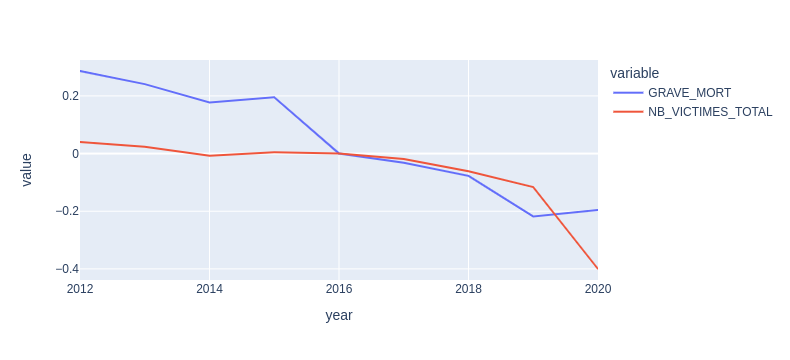

In [18]:
px.line(victimeOverTime, x='year', y='value', color='variable')

## Par véhicule

In [19]:
pivotYearVictimeType = pd.pivot_table(df, values=['NB_VICTIMES_TOTAL', 'GRAVE_MORT'], index=['TYPE', 'year'], aggfunc = 'sum')
normAutre = pivotYearVictimeType.loc[('Autre', 2016)]
normCamion = pivotYearVictimeType.loc[('CAMION', 2016)]
normPivotYearVictimeType = pivotYearVictimeType.copy()
normPivotYearVictimeType.loc['Autre']  = normPivotYearVictimeType.loc['Autre'].values/normAutre.values -1
normPivotYearVictimeType.loc['CAMION']  = normPivotYearVictimeType.loc['CAMION'].values/normCamion.values -1
victimeOverTimeType = normPivotYearVictimeType.reset_index().melt(id_vars=['year', 'TYPE'])


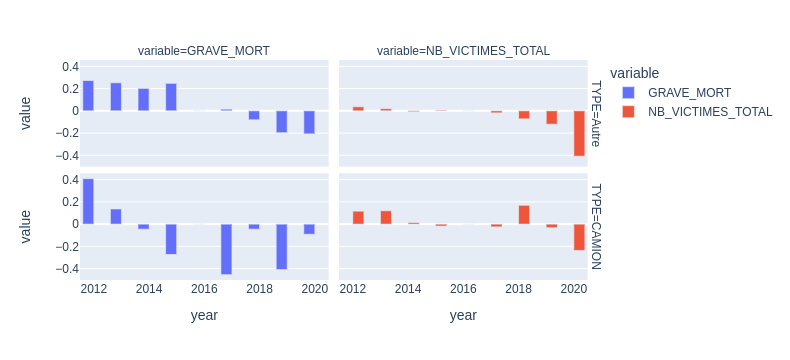

In [20]:
fig = px.bar(victimeOverTimeType,
             x='year',
             y='value',
             color='variable',
             facet_col = 'variable',
             facet_row='TYPE',
            barmode='group')
fig

In [21]:
fig.write_image('victimeYearType.png')

In [24]:
dfGM = df[df['GRAVE_MORT'] > 0]

In [25]:
dfGM

,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,...,LOC_LONG,LOC_LAT,year,month,day,weekday,GRAVE_MORT,NB_BLESSE_VEHICULE,NB_BLESSE_VELO_PIETON,TYPE
52,SPVM _ 2012 _ 10044,DI,2012-05-27,66023.0,NaN,NaN,NaN,JOSEPH,1.0,HENRI DUHAMEL,...,-73.571582,45.472372,2012,5,27,6,1,1,0,Autre
236,SPVM _ 2012 _ 1021,VE,2012-10-26,66023.0,NaN,NaN,NaN,BRUNSWICK,1.0,MONTROSE,...,-73.811355,45.476789,2012,10,26,4,1,1,0,Autre
679,SPVM _ 2012 _ 10609,DI,2012-03-04,66023.0,NaN,NaN,NaN,S,1.0,SHERBROOKE O ET CHOMEDEY,...,-73.585763,45.492738,2012,3,4,6,1,1,0,CAMION
741,SPVM _ 2012 _ 10665,DI,2012-03-18,66023.0,NaN,NaN,NaN,RENE LEVESQUE O,1.0,UNIVERSITY,...,-73.567360,45.501981,2012,3,18,6,1,3,0,Autre
757,SPVM _ 2012 _ 1068,MA,2012-11-27,66142.0,81.0,NaN,NaN,BRUNSWICK OPP,1.0,MONTROSE,...,-73.812294,45.476233,2012,11,27,1,1,2,0,CAMION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203880,SPVM _ 2020 _ 9882,ME,2020-06-17,66023.0,NaN,NaN,NaN,HENRI BOURASSA E,1.0,VALLADE,...,-73.611584,45.609567,2020,6,17,2,1,1,0,Autre
203886,SPVM _ 2020 _ 9888,VE,2020-06-19,66023.0,6700.0,NaN,NaN,GOUIN E,1.0,NaN,...,-73.622915,45.626507,2020,6,19,4,1,0,1,Autre
203918,SPVM _ 2020 _ 9916,LU,2020-06-29,66023.0,NaN,NaN,NaN,NaN,1.0,HENRI BOURASSA ET PELLETIER,...,-73.640139,45.598599,2020,6,29,0,1,2,0,CAMION
203922,SPVM _ 2020 _ 992,DI,2020-02-02,66023.0,NaN,NaN,NaN,HENRI BOURASSA O,NaN,DOUGLAS B FLOREANI,...,-73.757557,45.492937,2020,2,2,6,1,1,0,Autre
